In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import librosa as lr

import glob

import cv2

from keras.models import Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.layers import Dropout, Input, BatchNormalization
from keras.optimizers import Nadam


###  Defining Variables for data_size,training_size ,validation_size and test_size

In [6]:
in_dim = (192,192,3)
out_dim = 2
batch_size = 32
mp3_path = 'data/audio/'
#tr_path = 'data/train/'
#va_path = 'data/valid/'
#te_path = 'data/test/'
data_size = 779
tr_size = 500
va_size = 179
te_size = 100

In [7]:
def mp3_to_img(path, height=192, width=192):
    signal, sr = lr.load(path)
    hl = signal.shape[0]//(width*1.1) #this will cut away 5% from start and end
    spec = lr.feature.melspectrogram(signal, n_mels=height, hop_length=int(hl))
    img = lr.power_to_db(spec)**2
    start = (img.shape[1] - width) // 2
    return img[:, start:start+width]

In [5]:
def process_audio(in_folder, out_folder):
    os.makedirs(out_folder, exist_ok=True)
    files = glob.glob(in_folder+'*.mp3')
    start = len(in_folder)
    for file in files:
        img = mp3_to_img(file)
        #sp.misc.imsave(out_folder + file[start:] + '.jpg', img)
        cv2.imwrite(out_folder + file[start:] + '.jpg', img

"\ndef process_audio_with_classes(in_folder, out_folder, labels):\n    os.makedirs(out_folder, exist_ok=True)\n    for i in range(len(labels['Sample Filename'])):\n        file = labels['Sample Filename'][i]\n        lang = labels['Language'][i]\n        os.makedirs(out_folder + lang, exist_ok=True)\n        img = mp3_to_img(in_folder+file)\n        imageio.imwrite(out_folder + lang + '/' + file + '.jpg', img)\n"

In [23]:
def jpgs_to_list(source):
    files = glob.glob(source+'*.jpg')
    imageList = []
    for file in files:
        imageList.append(np.array(cv2.imread(file)))
        #da.from_array(cv2.imread(file).astype(),chunks = 779).to_hdf5(target, name)
    return imageList

In [ ]:
process_audio('data/mp3/', 'data/jpg/')

In [24]:
imageList = np.array(jpgs_to_list('data/jpg/'))

In [60]:
y = pd.read_csv('data/train_list.csv')['Language']
y = pd.get_dummies(y)
y = y.reindex(sorted(y.columns), axis=1)
y = y.values
#y = da.from_array(y, chunks=779)

In [62]:
y = pd.read_csv('data/train_list.csv')['Language']
y = np.where(y=='English',1,0)

In [93]:
shfl = np.random.permutation(779)

tr_idx = shfl[:tr_size]
va_idx = shfl[tr_size:tr_size+va_size]
te_idx = shfl[tr_size+va_size:]

x_tr = imageList[tr_idx]
y_tr = y[tr_idx]
x_va = imageList[va_idx]
y_ya = y[va_idx]
x_te = imageList[te_idx]
y_te = y[te_idx]

Let's check a sample just to be sure

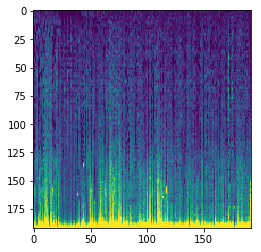

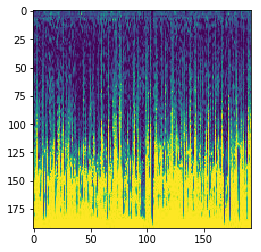

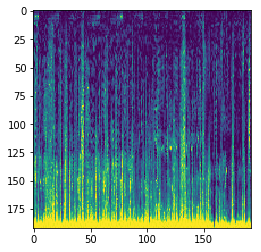

In [74]:
test_img = x_tr[498, :, :,2]
test_img2 = x_tr[420, :, :,2]
test_img3 = x_tr[69, :, :,2]
#test_img4 = x_tr[786, :, :,0]
plt.imshow(test_img)
plt.show()
plt.imshow(test_img2)
plt.show()
plt.imshow(test_img3)
plt.show()
#plt.imshow(test_img4)
#plt.show()

In [76]:
 i = Input(shape=(192,192,3))
m = Conv2D(16, (3, 3), activation='relu', padding='same')(i)
m = MaxPooling2D()(m)
m = Conv2D(32, (3, 3),activation='relu' , padding='same')(m)
m = MaxPooling2D()(m) 
m = Conv2D(64, (3, 3),activation='relu' , padding='same')(m)
m = MaxPooling2D()(m)
m = Conv2D(128, (3, 3),activation='relu', padding='same')(m)
m = MaxPooling2D()(m)
m = Conv2D(32, (3, 3),activation='relu' , padding='same')(m)
m = MaxPooling2D()(m)
m = Flatten()(m)
m = Dense((16),activation='relu')(m)
m = Dense((16),activation = 'relu')(m)
m = Dropout(0.5)(m)
o = Dense((1), activation='sigmoid')(m)

model = Model(inputs=i, outputs=o)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 192, 192, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 192, 192, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [84]:
from keras.models import Sequential
from keras.optimizers import SGD

In [95]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(192, 192, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(1, activation='sigmoid'))
# opt = SGD(lr=0.001, momentum=0.9)

In [96]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_tr, y_tr, epochs=1, batch_size = 32, verbose=1, validation_data = (x_va, y_ya))

Train on 500 samples, validate on 179 samples
Epoch 1/1
500/500 [==============================] - 50s 100ms/step - loss: 7.7161 - acc: 0.5160 - val_loss: 7.8376 - val_acc: 0.5084


In [97]:
model.evaluate(x_te, y_te)

100/100 [==============================] - 3s 30ms/step


[7.8117685127258305, 0.51]

In [111]:
def Testing(string,x):
    if x==True:
        process_audio('data/test/mp3/','data/test/jpg/')
    xTest = np.array(cv2.imread('data/test/jpg/' + string + '.jpg'))
    xTest.reshape(1,xTest.shape[0],xTest.shape[1],xTest.shape[2])
    return xTest

In [119]:
jjj = (Testing('Hindi (364).mp3',False)).reshape(1,192,192,3)

In [120]:
prediction = model.predict(jjj)
if(prediction[0]>0.5):
    print('ENGLISH')
else:
    print('HINDI')

ENGLISH
